# Especialização em Inteligência Artificial

**Aprendizado de Máquina - Aula 7.3: Medidas de avaliação**

Código de exemplo desenvolvido pelo docente [Adriano Rivolli](mailto:rivolli@utpfr.edu.br)

*O código apresenta o uso das medidas de avaliação de agrupamento*

## Preparação dos dados e geração dos grupos

In [ ]:
import numpy as np
import random
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

aleatorio = np.random.RandomState(42)
grupo_random = aleatorio.permutation(y)

labels = {}
for k in range(2, 7):
  kmeans = KMeans(n_clusters=k, random_state=1, n_init=10).fit(X)
  labels[k] = kmeans.labels_

In [ ]:
def plot_2d_data_with_labels(X, y, title='2D Data Plot'):
    """
    Plots 2D data points with labels using different colors.

    Parameters:
    X (array-like): 2D array of data points with shape (n_samples, 2)
    y (array-like): 1D array of labels with shape (n_samples,)
    title (str): Title of the plot
    """
    # Ensure X is a 2D array and y is a 1D array
    X = np.array(X)
    y = np.array(y)

    if X.shape[1] != 2:
        raise ValueError("X should be a 2D array with shape (n_samples, 2)")

    unique_labels = np.unique(y)

    # Default color palette
    default_colors = ['navy', 'turquoise', 'darkorange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

    # Create a color dictionary from unique labels
    color_dict = {label: default_colors[i % len(default_colors)] for i, label in enumerate(unique_labels)}

    plt.figure(figsize=(5, 3))

    # Plot each label with its corresponding color
    for label in unique_labels:
        plt.scatter(X[y == label, 0], X[y == label, 1], color=color_dict[label], label=label, alpha=0.8, lw=2)

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

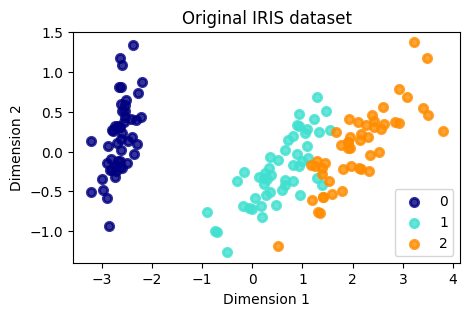

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
plot_2d_data_with_labels(X_r, y, title='Original IRIS dataset')

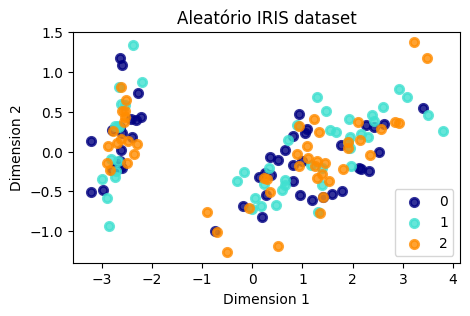

In [ ]:
plot_2d_data_with_labels(X_r, grupo_random, title='Aleatório IRIS dataset')

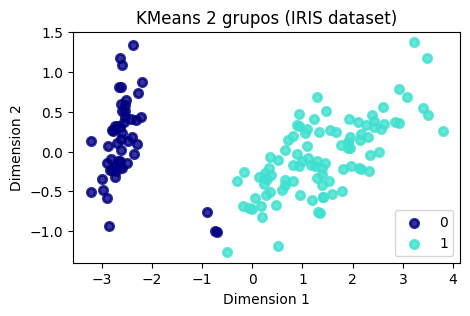

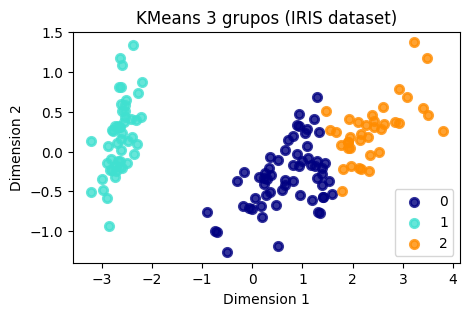

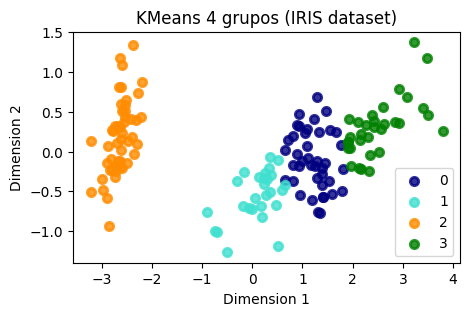

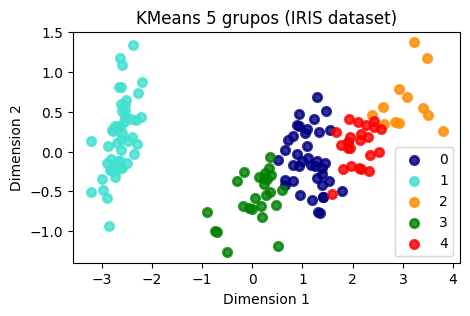

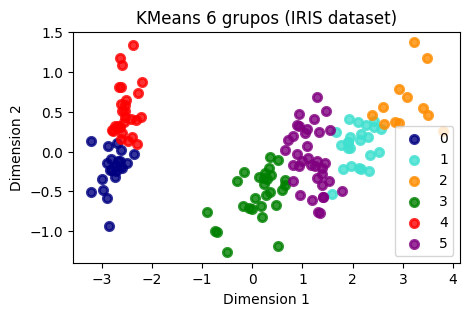

In [ ]:
for k in range(2, 7):
  plot_2d_data_with_labels(X_r, labels[k], title=f'KMeans {k} grupos (IRIS dataset)')

# Validação interna

## Davies-Bouldin Index
Valores próximos de zero indicam melhores partições

In [ ]:
from sklearn.metrics import davies_bouldin_score

print("Agrupamento original: ", davies_bouldin_score(X, y))
print("Agrupamento aleatório: ", davies_bouldin_score(X, grupo_random))
for k in range(2, 7):
  print("Agrupamento", k, "grupos:", davies_bouldin_score(X, labels[k]))

Agrupamento original:  0.7513707094756737
Agrupamento aleatório:  20.170842721334036
Agrupamento 2 grupos: 0.40429283717304343
Agrupamento 3 grupos: 0.6619715465007465
Agrupamento 4 grupos: 0.7757009440067065
Agrupamento 5 grupos: 0.8059652120182736
Agrupamento 6 grupos: 0.9257700719826135


## Calinski-Harabasz index

Quanto maior o valor melhor o resultado

In [ ]:
from sklearn.metrics import calinski_harabasz_score

print("Agrupamento original: ", calinski_harabasz_score(X, y))
print("Agrupamento aleatório: ", calinski_harabasz_score(X, grupo_random))
for k in range(2, 7):
  print("Agrupamento", k, "grupos:", calinski_harabasz_score(X, labels[k]))

Agrupamento original:  487.33087637489984
Agrupamento aleatório:  0.6738858752078322
Agrupamento 2 grupos: 513.9245459802768
Agrupamento 3 grupos: 561.62775662962
Agrupamento 4 grupos: 530.4871420421675
Agrupamento 5 grupos: 495.54148767768777
Agrupamento 6 grupos: 473.5154538824768


## Silhouette Coefficient

A medida varia entre -1 e 1, sendo 1 o melhor resultado possível

In [ ]:
from sklearn.metrics import silhouette_score

print("Agrupamento original: ", silhouette_score(X, y))
print("Agrupamento aleatório: ", silhouette_score(X, grupo_random))
for k in range(2, 7):
  print("Agrupamento", k, "grupos:", silhouette_score(X, labels[k]))

Agrupamento original:  0.5034774406932961
Agrupamento aleatório:  -0.04049530979356153
Agrupamento 2 grupos: 0.6810461692117462
Agrupamento 3 grupos: 0.5528190123564095
Agrupamento 4 grupos: 0.4974551890173751
Agrupamento 5 grupos: 0.48874888709310566
Agrupamento 6 grupos: 0.36784649847122436


### Silhouette para as instâncias

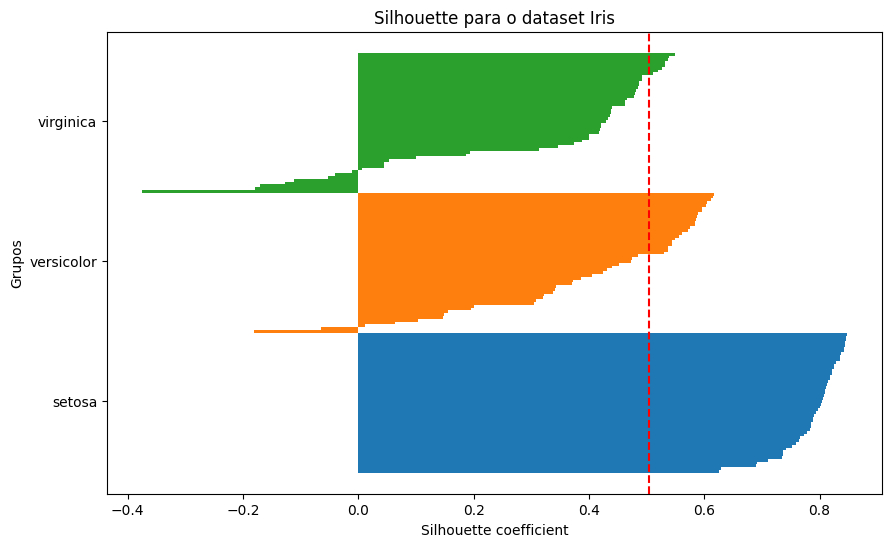

In [ ]:
from sklearn.metrics import silhouette_samples

# Calcular o Silhouette Score para cada instância
silhouette_vals = silhouette_samples(X, y)

# Criar um gráfico de Silhouette Scores
plt.figure(figsize=(10, 6))
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(y)):
    cluster_silhouette_vals = silhouette_vals[y == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, edgecolor='none')
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, target_names)
plt.ylabel('Grupos')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette para o dataset Iris')
plt.show()

# Validação externa

## Matriz de contingência

In [ ]:
import seaborn as sns

def plot_contingency_matrix(cont_matrix, titulo='Matriz de contingência'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cont_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel('Grupos Previstos')
    plt.ylabel('Grupos Verdadeiros')
    plt.title(titulo)
    plt.show()

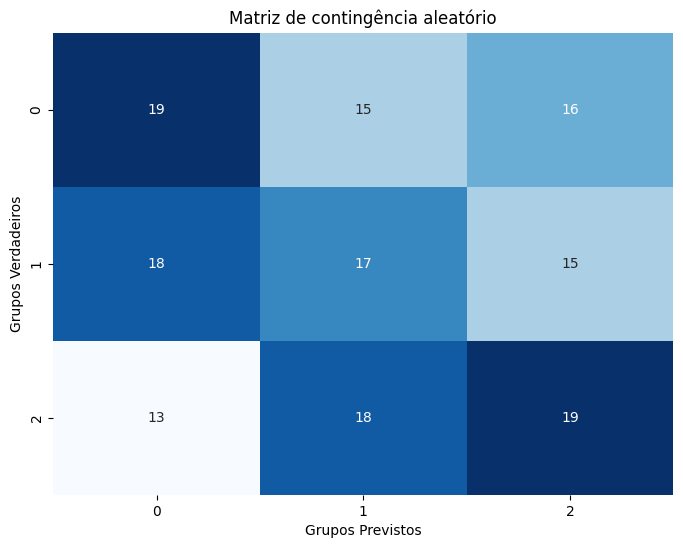

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

cont_matrix = contingency_matrix(y, grupo_random)
plot_contingency_matrix(cont_matrix, 'Matriz de contingência aleatório')

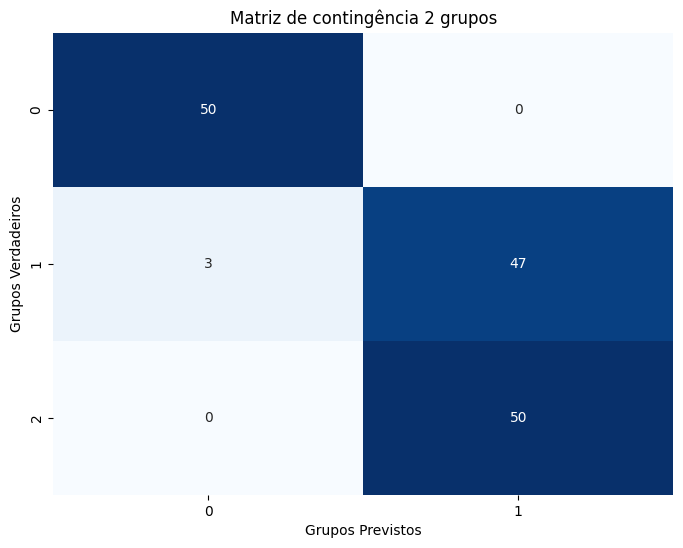

In [ ]:
cont_matrix = contingency_matrix(y, labels[2])
plot_contingency_matrix(cont_matrix, 'Matriz de contingência 2 grupos')

## Matriz de confusão

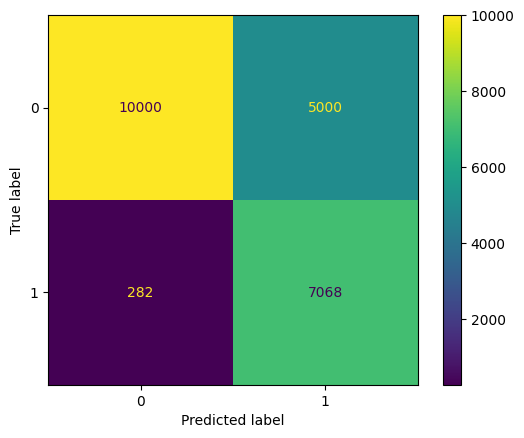

In [ ]:
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = pair_confusion_matrix(y, labels[2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')

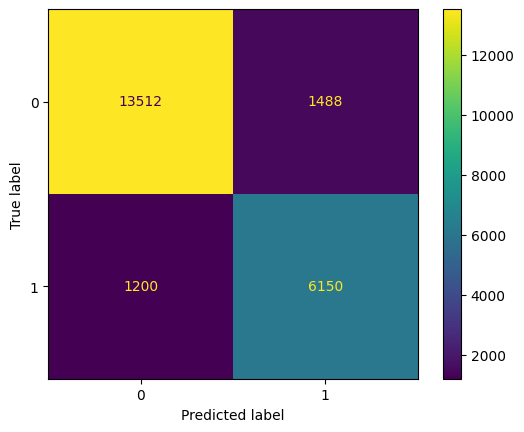

In [ ]:
cm = pair_confusion_matrix(y, labels[3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')

## Rand Index
Um agrupamento perfeito gera o valor 1

In [ ]:
from sklearn.metrics import rand_score, adjusted_rand_score

print("Agrupamento original:", rand_score(y, y), adjusted_rand_score(y, y))
print("Agrupamento aleatório:", rand_score(y, grupo_random), adjusted_rand_score(y, grupo_random))
for k in range(2, 7):
  print("Agrupamento", k, "grupos:", rand_score(y, labels[k]), adjusted_rand_score(y, labels[k]))

Agrupamento original: 1.0 1.0
Agrupamento aleatório: 0.5556152125279642 -0.006712925170068027
Agrupamento 2 grupos: 0.763668903803132 0.5399218294207123
Agrupamento 3 grupos: 0.8797315436241611 0.7302382722834697
Agrupamento 4 grupos: 0.8522595078299776 0.6460787233460947
Agrupamento 5 grupos: 0.839731543624161 0.6078964652364223
Agrupamento 6 grupos: 0.7880984340044743 0.45507224888954784


## Mutual Information
Um agrupamento perfeito gera o valor 1

In [ ]:
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score

print("Agrupamento original:", mutual_info_score(y, y), normalized_mutual_info_score(y, y), adjusted_mutual_info_score(y, y))
print("Agrupamento aleatório:", mutual_info_score(y, grupo_random), normalized_mutual_info_score(y, grupo_random), adjusted_mutual_info_score(y, grupo_random))
for k in range(2, 7):
  print("Agrupamento", k, "grupos:", mutual_info_score(y, labels[k]), normalized_mutual_info_score(y, labels[k]), adjusted_mutual_info_score(y, labels[k]))

Agrupamento original: 1.0986122886681096 1.0 1.0
Agrupamento aleatório: 0.00694900708959767 0.006325258839059794 -0.006110378470412873
Agrupamento 2 grupos: 0.5738298777087831 0.6565191143081124 0.6538380713762781
Agrupamento 3 grupos: 0.8255910976103356 0.7581756800057784 0.7551191675800485
Agrupamento 4 grupos: 0.8846414796605856 0.7199262269988784 0.7151742230795868
Agrupamento 5 grupos: 0.9051279136224294 0.6938628345588717 0.6872109247445372
Agrupamento 6 grupos: 0.9128782615091873 0.6418446157354109 0.6328880142346162


## Homogeneity, completeness and V-measure
Medida varia entre 0 e 1, sendo 1 o resultado ideal
* **Homogeneity**: Cada grupo contém apenas membros de uma única classe
* **Completeness**: Cada classe está no mesmo grupo
* **V-measure**: Média harmônica entre as duas medidas

In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import homogeneity_completeness_v_measure

print("Agrupamento original:", homogeneity_score(y, y), completeness_score(y, y), v_measure_score(y, y))
print("Agrupamento aleatório:", homogeneity_score(y, grupo_random), completeness_score(y, grupo_random), v_measure_score(y, grupo_random))
for k in range(2, 7):
  print("Agrupamento", k, "grupos:", homogeneity_score(y, labels[k]), completeness_score(y, labels[k]), v_measure_score(y, labels[k]))

Agrupamento original: 1.0 1.0 1.0
Agrupamento aleatório: 0.006325258839059794 0.006325258839059794 0.006325258839059794
Agrupamento 2 grupos: 0.5223224641010155 0.8835142349190769 0.6565191143081123
Agrupamento 3 grupos: 0.7514854021988338 0.7649861514489815 0.7581756800057784
Agrupamento 4 grupos: 0.8052353762882726 0.650961349654246 0.7199262269988783
Agrupamento 5 grupos: 0.8238829320940431 0.59928706467119 0.6938628345588715
Agrupamento 6 grupos: 0.8309376027605745 0.5228596393917885 0.6418446157354109


In [ ]:
print('Todos de uma vez:', homogeneity_completeness_v_measure(y, labels[3]))
print('Homogeneity:', round(homogeneity_score(y, labels[3]), 5))
print('Completeness:', round(completeness_score(labels[3], y), 5))

Todos de uma vez: (0.7514854021988338, 0.7649861514489815, 0.7581756800057784)
Homogeneity: 0.75149
Completeness: 0.75149


## Fowlkes-Mallows
A medida varia entre 0 e 1, sendo 1 o resultado ideal

In [ ]:
from sklearn.metrics import fowlkes_mallows_score

print("Agrupamento original:", fowlkes_mallows_score(y, y))
print("Agrupamento aleatório:", fowlkes_mallows_score(y, grupo_random))
for k in range(2, 7):
  print("Agrupamento", k, "grupos:", fowlkes_mallows_score(y, labels[k]))

Agrupamento original: 1.0
Agrupamento aleatório: 0.3243537414965986
Agrupamento 2 grupos: 0.7504732564880243
Agrupamento 3 grupos: 0.8208080729114153
Agrupamento 4 grupos: 0.7539699941396392
Agrupamento 5 grupos: 0.7254830776265845
Agrupamento 6 grupos: 0.608611697218172
